### Ej1 - DATASET MUSHR0OM

`class`: edible(e) or poisonous(p)

`cap-shape`: bell(b), conical(c), convex(x), flat(f), knobbed(k), sunken(s)

`cap-surface`: fibrous(f), grooves(g), scaly(y), smooth(s)

`cap-color`: brown(n), buff(b), cinnamon(c), gray(g), green(r), pink(p), purple(u), red(e), white(w), yellow(y)

`bruises`: bruises(t), no bruises(f)

`odor`: almond(a), anise(l), creosote(c), fishy(y), foul(f), musty(m), none(n), pungent(p), spicy(s)

`gill-attachment`: attached(a), descending(d), free(f), notched(n)

`gill-spacing`: close(c), crowded(w), distant(d)

`gill-size`: broad(b), narrow(n)

`gill-color`: black(k), brown(n), buff(b), chocolate(h), gray(g), green(r), orange(o), pink(p), purple(u), red(e), white(w), yellow(y)

`stalk-shape`: enlarging(e), tapering(t)

`stalk-root`: bulbous(b), club(c), cup(u), equal(e), rhizomorphs(z), rooted(r), missing(?)

`stalk-surface-above-ring`: fibrous(f), scaly(y), silky(k), smooth(s)

`stalk-surface-below-ring`: fibrous(f), scaly(y), silky(k), smooth(s)

`stalk-color-above-ring`: brown(n), buff(b), cinnamon(c), gray(g), orange(o), pink(p), red(e), white(w), yellow(y)

`stalk-color-below-ring`: brown(n), buff(b), cinnamon(c), gray(g), orange(o), pink(p), red(e), white(w), yellow(y)

`veil-type`: partial(p), universal(u)

`veil-color`: brown(n), orange(o), white(w), yellow(y)

`ring-number`: none(n), one(o), two(t)

`ring-type`: cobwebby(c), evanescent(e), flaring(f), large(l), none(n), pendant(p), sheathing(s), zone(z)

`spore-print-color`: black(k), brown(n), buff(b), chocolate(h), green(r), orange(o), purple(u), white(w), yellow(y)

`population`: abundant(a), clustered(c), numerous(n), scattered(s), several(v), solitary(y)

`habitat`: grasses(g), leaves(l), meadows(m), paths(p), urban(u), waste(w), woods(d)

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import auc, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [61]:
df = pd.read_csv('4_mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [62]:
df = df[[col for col in df.columns if col != 'class'] + ['class']]
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [64]:
for i in df.columns:
    print(i,':',df[i].unique())
    print('\n')

cap-shape : ['x' 'b' 's' 'f' 'k' 'c']


cap-surface : ['s' 'y' 'f' 'g']


cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']


bruises : ['t' 'f']


odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']


gill-attachment : ['f' 'a']


gill-spacing : ['c' 'w']


gill-size : ['n' 'b']


gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']


stalk-shape : ['e' 't']


stalk-root : ['e' 'c' 'b' 'r' '?']


stalk-surface-above-ring : ['s' 'f' 'k' 'y']


stalk-surface-below-ring : ['s' 'f' 'y' 'k']


stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']


stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']


veil-type : ['p']


veil-color : ['w' 'n' 'o' 'y']


ring-number : ['o' 't' 'n']


ring-type : ['p' 'e' 'l' 'f' 'n']


spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']


population : ['s' 'n' 'a' 'v' 'y' 'c']


habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


class : ['p' 'e']




In [65]:
df.replace('nan', np.nan, inplace=True)
for i in df.columns:
    if df[i].isnull().sum() == 0 or df[i].isna().sum() == 0 or df[i].isnull().sum() == 0 and df[i].isna().sum() == 0:
        print('No hay valores nulos en',i)
    else:
        print('Si hay valores nulos en',i,'{:.2f}%'.format(df[i].isnull().sum()/len(df[i])*100),df[i].dtype)

No hay valores nulos en cap-shape
No hay valores nulos en cap-surface
No hay valores nulos en cap-color
No hay valores nulos en bruises
No hay valores nulos en odor
No hay valores nulos en gill-attachment
No hay valores nulos en gill-spacing
No hay valores nulos en gill-size
No hay valores nulos en gill-color
No hay valores nulos en stalk-shape
No hay valores nulos en stalk-root
No hay valores nulos en stalk-surface-above-ring
No hay valores nulos en stalk-surface-below-ring
No hay valores nulos en stalk-color-above-ring
No hay valores nulos en stalk-color-below-ring
No hay valores nulos en veil-type
No hay valores nulos en veil-color
No hay valores nulos en ring-number
No hay valores nulos en ring-type
No hay valores nulos en spore-print-color
No hay valores nulos en population
No hay valores nulos en habitat
No hay valores nulos en class


In [66]:
df['class'] = df['class'].map({'p': 0, 'e': 1})
print(df['class'].unique(),sep='\n')

[0 1]


In [67]:
df_encoded = df.iloc[:, :-1].copy()
le = LabelEncoder()

for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded = pd.concat([df_encoded, df.iloc[:, -1]], axis=1)
df_encoded.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,0
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,1
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,1
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,0
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,1


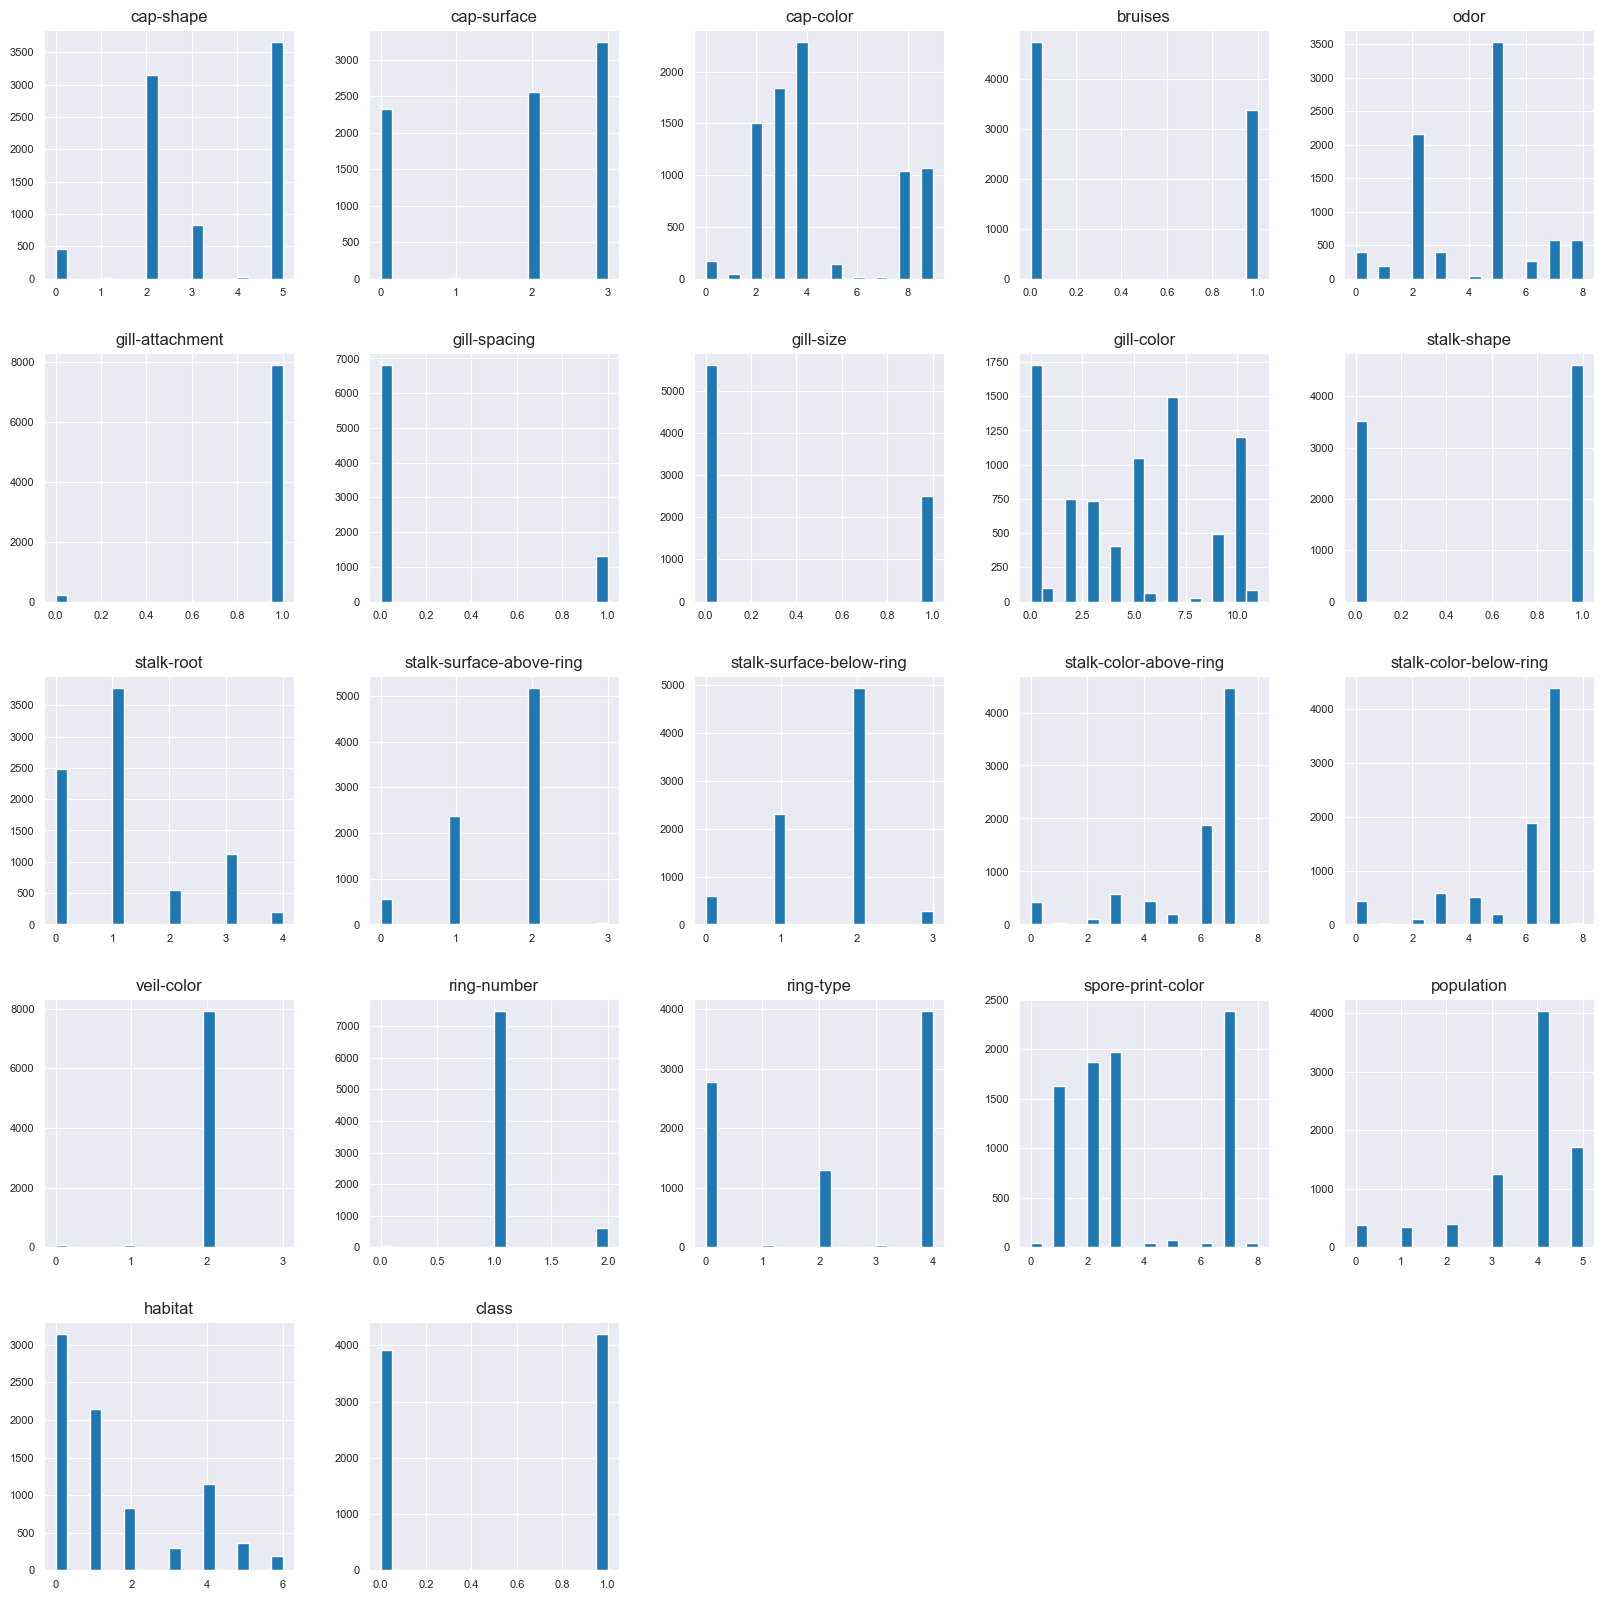

In [84]:
hist = df_encoded.hist(figsize=(20, 20), bins=20, xlabelsize=8, ylabelsize=8)

<Axes: >

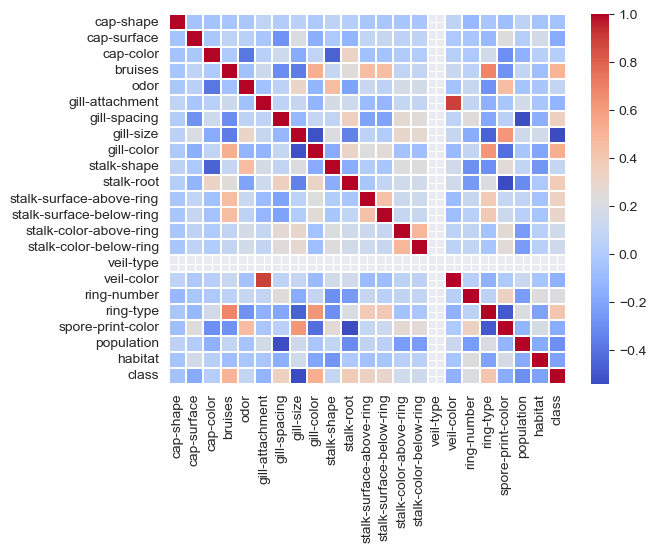

In [68]:
corr = df_encoded.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm',linewidths=0.2)

<Axes: >

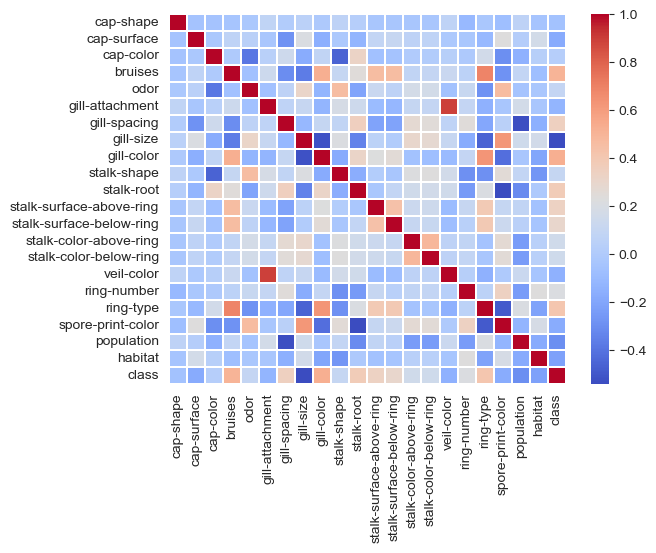

In [69]:
# drop de veil-type, por el hecho de ser constante y tener 0 influencia en el estudio
df_encoded.drop('veil-type', axis=1, inplace=True)
corr = df_encoded.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm',linewidths=0.2)

### MODELOS

Logistic regression, linear discriminant analysis, quadratic discriminant analysis 



In [70]:
X = df_encoded.iloc[:, :-1]
y = df_encoded.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1010)
print("Instancias X_train dataset: ", X_train.shape)
print("Instancias y_train dataset: ", y_train.shape)
print("Instancias X_test dataset: ", X_test.shape)
print("Instancias y_test dataset: ", y_test.shape,'\n')
print("Class antes del sobre muestreo: '1': {}".format(sum(y_train==1)))
print("Class antes del sobre muestreo: '0': {} \n".format(sum(y_train==0)))
print("No es necesario hacer sobre muestreo (SMOTE), ya que las clases están balanceadas")

Instancias X_train dataset:  (5686, 21)
Instancias y_train dataset:  (5686,)
Instancias X_test dataset:  (2438, 21)
Instancias y_test dataset:  (2438,) 

Class antes del sobre muestreo: '1': 2930
Class antes del sobre muestreo: '0': 2756 

No es necesario hacer sobre muestreo (SMOTE), ya que las clases están balanceadas


In [71]:
# Logistic Regression

logreg = LogisticRegression(random_state = 0, solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred_logreg= logreg.predict(X_test)
print("Porcentaje de precision: ", accuracy_score(y_test, y_pred_logreg))

Porcentaje de precision:  0.9487284659557014


c:\Users\dell_\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
print(confusion_matrix(y_test, y_pred_logreg))
accuracy_score(y_test, y_pred_logreg)

[[1087   73]
 [  52 1226]]


0.9487284659557014

In [73]:
scores = cross_val_score(logreg, X_train, y_train.ravel(), cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[0.94639719 0.94635004 0.95074758 0.95426561 0.94635004]
Accuracy: 0.95 (+/- 0.00)


c:\Users\dell_\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dell_\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

c:\Users\dell_\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


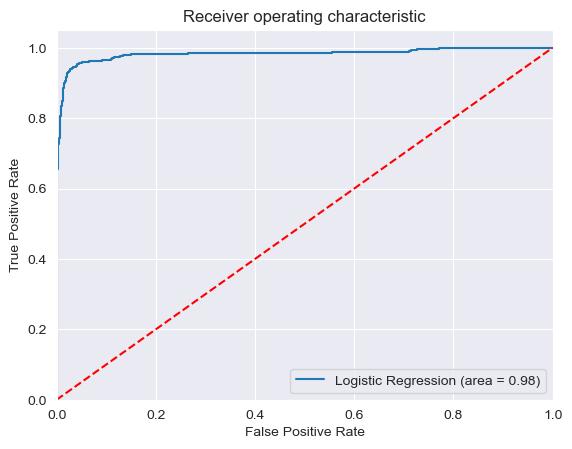

In [74]:
sns.set_style("darkgrid")
tmp = logreg.fit(X_train, y_train.ravel())
y_pred_sample_score = tmp.decision_function(X_test)
logit_roc_auc = roc_auc_score(y_test,y_pred_sample_score)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_sample_score)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [75]:
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print("Precision:",accuracy_score(y_test, y_pred_logreg)*100,"%")

[[1087   73]
 [  52 1226]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1160
           1       0.94      0.96      0.95      1278

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438

Precision: 94.87284659557014 %


LDA y QDA son técnicas de aprendizaje automático que se utilizan para la clasificación de datos, donde LDA asume que las covarianzas de las diferentes clases son iguales y QDA permite covarianzas diferentes.

In [76]:
# linear discriminant analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train.ravel())
y_prob_lda = lda.predict_proba(X_test)[:,1]
y_pred_lda = np.where(y_prob_lda > 0.5, 1, 0)

In [77]:
lda_confusion_matrix = confusion_matrix(y_test, y_pred_lda)
lda_confusion_matrix

array([[1083,   77],
       [  50, 1228]], dtype=int64)

In [78]:
print(confusion_matrix(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))
print("Precision:",accuracy_score(y_test, y_pred_lda)*100,"%")

[[1083   77]
 [  50 1228]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1160
           1       0.94      0.96      0.95      1278

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438

Precision: 94.79081214109925 %


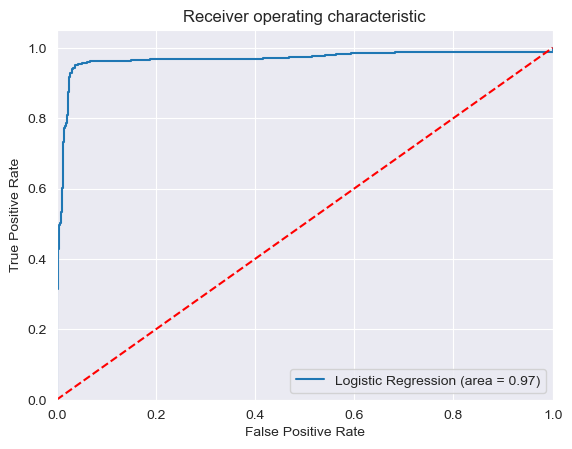

In [79]:
sns.set_style("darkgrid")
tmp = lda.fit(X_train, y_train.ravel())
y_pred_sample_score = tmp.decision_function(X_test)
logit_roc_auc = roc_auc_score(y_test,y_pred_sample_score)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_sample_score)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [80]:
# Quadratic Discriminant Analysis (QDA) 

qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train.ravel())

y_prob_qda = qda.predict_proba(X_test)[:,1]
y_pred_qda = np.where(y_prob_qda > 0.5, 1, 0)
qda_confusion_matrix = confusion_matrix(y_test, y_pred_qda)
qda_confusion_matrix

array([[1147,   13],
       [   0, 1278]], dtype=int64)

In [81]:
print(confusion_matrix(y_test, y_pred_qda))
print(classification_report(y_test, y_pred_qda))
print("Precision:",accuracy_score(y_test, y_pred_qda)*100,"%")

[[1147   13]
 [   0 1278]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1160
           1       0.99      1.00      0.99      1278

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438

Precision: 99.4667760459393 %


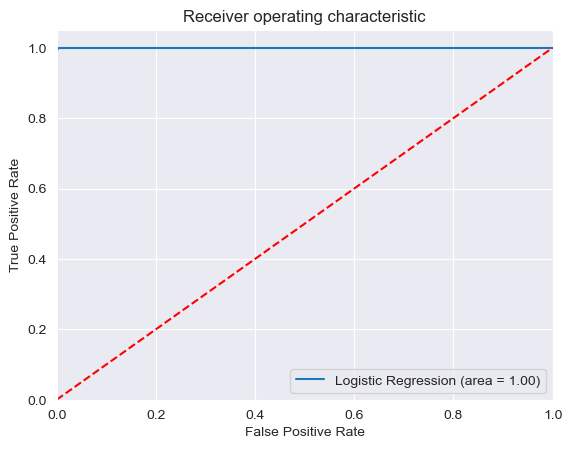

In [82]:
sns.set_style("darkgrid")
tmp = qda.fit(X_train, y_train.ravel())
y_pred_sample_score = tmp.decision_function(X_test)
logit_roc_auc = roc_auc_score(y_test,y_pred_sample_score)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_sample_score)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()